# First AI Project

In [2]:
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0-dev20210330


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

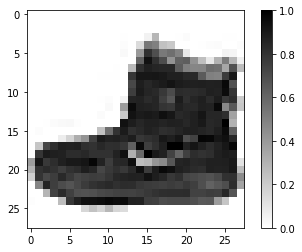

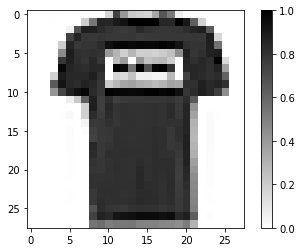

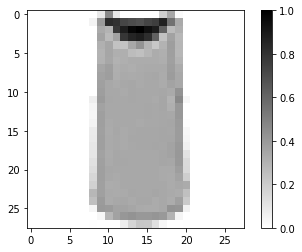

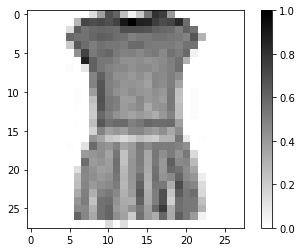

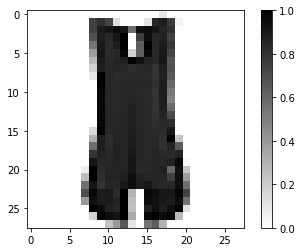

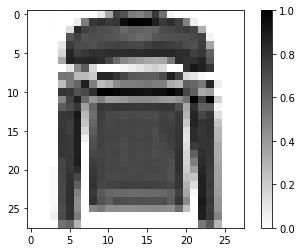

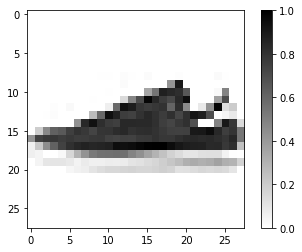

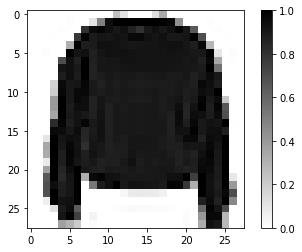

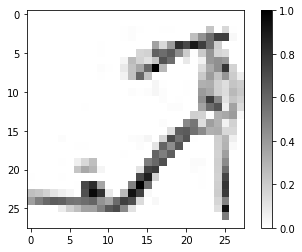

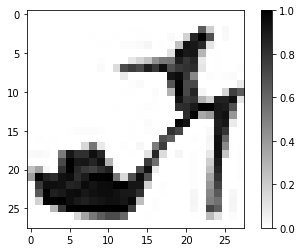

In [25]:
for i in range(0,10):
    plt.figure()
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

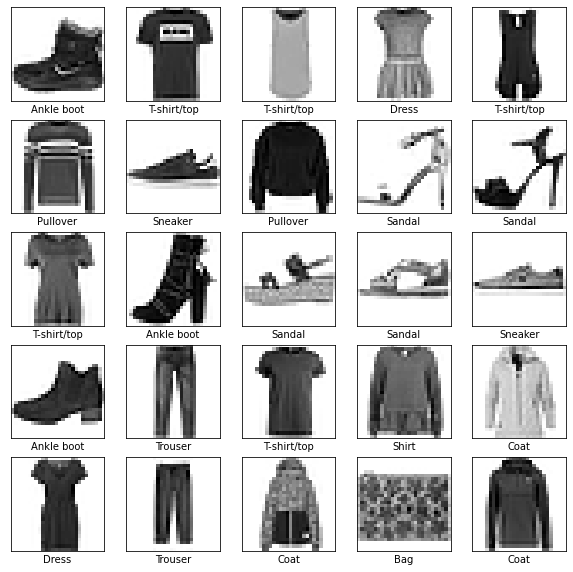

In [26]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6338 - accuracy: 0.7778
Epoch 2/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3859 - accuracy: 0.8605
Epoch 3/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3443 - accuracy: 0.8741
Epoch 4/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3104 - accuracy: 0.8861
Epoch 5/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2942 - accuracy: 0.8917: 0s - loss: 0.2942 - accuracy: 0.89
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2842 - accuracy: 0.8952
Epoch 7/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2659 - accuracy: 0.8994
Epoch 8/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2593 - accuracy: 0.9038
Epoch 9/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2475 - accuracy: 0.9079
Epoch 10/30
1875/1875 [=======================

In [31]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(f'\nTest accuracy: {test_acc}')

313/313 - 0s - loss: 0.3823 - accuracy: 0.8885

Test accuracy: 0.8884999752044678


In [32]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [43]:
predictions = probability_model.predict(test_images)
np.argmax(predictions[0])

9

In [46]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [47]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [50]:
predictions_single = probability_model.predict(img)

np.argmax(predictions_single[0])

2

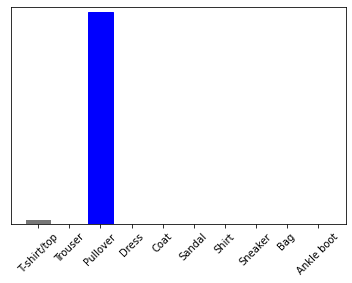

In [49]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)